# Datenanalyse Teil 2 (Lösungen)

☝️ Beachte: Es gibt beim Programmieren fast immer verschiedene Lösungswege. Deine Lösung mag anders aussehen, aber dennoch zum gewünschten Resultat führen. Das richtige Resultat ist das Wichtigste. 

⚠️ Führ folgenden Code aus, bevor Du einzelne Lösungen ausführst. Im Lehrnotebook sortieren wir das DataFrame zu einem bestimmten Zeitpunkt. Diese Sortierung nehmen wir im Lösungsnotebook nicht vor, weswegen die Reihenfolge der Zeilen ab einem gewissen Punkt abweicht. Dies ist nicht weiter schlimm und wird bloß erwähnt, dass Du Dich nicht wunderst, warum die Daten zwischen den beiden Notebooks vermeintlich anders ausschauen.

In [1]:
import pandas as pd

#Achtung: anderer Pfad als im Notebook, da das Lösungsnotebook in einem anderen Verzeichnis liegt 
with open("../../3_Dateien/Songkorpus/songkorpus_token.tsv") as f:
    songkorpus = pd.read_csv(f, sep="\t")
    
#Umbenennen der Spalten
songkorpus.columns = ["Token", "Jahr", "Häufigkeit"]

#Anfügen einer Spalte für das Jahrzehnt
decades = []
for year in (songkorpus["Jahr"]):
    decade = str(year)[:-1] + "0"
    decades.append(decade)
    
songkorpus["Jahrzehnt"] = decades
original_len = len(songkorpus)

#Anfügen einer Spalte für die Länge
lengths = []
for token in songkorpus["Token"]:
    length = len(str(token)) 
    lengths.append(length)
songkorpus["Länge"] = lengths


✏️ **Lösung 1:** Erstell ein Sub-DataFrame, das nur Tokens beinhaltet, die mindestens 20 Zeichen lang sind.

In [2]:
long_words = songkorpus[songkorpus["Länge"] >= 20]
long_words

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge
111,*ratata-ratarata-ratata*,2015,2,2010,24
166,-ell-ell-ell-ell-ell,2019,1,2010,20
388,1.......2.....3.....4.....5.....6.....7.....8....,1982,1,1980,51
505,100.000-Euro-Lächeln,2013,1,2010,20
856,187-Strassenbande-Fußtattoo,2022,1,2020,27
...,...,...,...,...,...
385866,„K-K-K-K-KitschKrieg,2020,1,2020,20
386040,„Panini-Fußball-Bilder,1996,1,1990,22
386119,„Selbstverwirklichung“,2019,1,2010,22
386404,„ich-fang'-alle-Blicke“-Pöter,1995,1,1990,29


***

✏️ **Lösung 2:** Erstell das gleiche Sub-DataFrame wie in Übung 9 (also eines, das nur Tokens beinhaltet, die mindestes 20 Zeichen lang sind), allerdings ohne dabei die Spalte "Länge" zu bemühen. Du kannst dazu eine Methode verwenden, die auch bei normalen strings funktioniert. Stell sicher, dass die Ergebnisse der beiden Übungen identisch sind.

In [3]:
long_words_2 = songkorpus[songkorpus["Token"].str.len() >= 20]

#Überprüfen, ob die beiden Ergebnisse identisch sind:

#Unsichere Methode, da ja in den Zeilen andere Werte stehen könnten:
print(len(long_words_2) == len(long_words))

#Sichere Methode, da wir erst sämtliche Werte vergleichen und dann 'True' bzw. 'False' auszählen
same_values = long_words_2 == long_words
print(same_values.value_counts()) #Es kommt nur jeweils 'True' vor, also sind die beiden Ergebnisse identisch

#Pandas bietet dafür auch eine Methode, nämlich 'equals()':
long_words_2.equals(long_words)

True
Token  Jahr  Häufigkeit  Jahrzehnt  Länge
True   True  True        True       True     1060
dtype: int64


True

*** 

✏️ **Lösung 3:** Oben haben wir die Spalte "Jahrzehnt" basierend auf den Jahreszahlen mithilfe eines ```for```-Loops geschaffen. Geh abermals von der Spalte "Jahr" aus, um eine neue Spalte "Jahrzehnt_ohne_Loop" zu schaffen, allerdings – wie der Name verrät – ohne dafür einen Loop, auch nicht in Form einer List Comprehension, zu benutzen. Mit anderen Worten: Du sollst pandas-Syntax dafür einsetzen. Wenn Dein Code stimmt, ergibt die bereits geschriebene (derzeit auskommentierte) Zeile ```True```.

In [4]:
songkorpus["Jahrzehnt_ohne_Loop"] = songkorpus["Jahr"].astype(str).str.slice(0,-1) + "0"
print(songkorpus["Jahrzehnt"].equals(songkorpus["Jahrzehnt_ohne_Loop"]))
songkorpus

True


,Token,Jahr,Häufigkeit,Jahrzehnt,Länge,Jahrzehnt_ohne_Loop
0,Klaround,2007,1,2000,8,2000
1,#3,2009,1,2000,2,2000
2,#Babo,2015,1,2010,5,2010
3,#JeSuisPasséChezSo,2018,1,2010,18,2010
4,#Nachbar,2016,1,2010,8,2010
...,...,...,...,...,...,...
386505,﻿Vierzehn,2020,1,2020,9,2020
386506,﻿Was,2020,1,2020,4,2020
386507,﻿Weißer,2020,1,2020,7,2020
386508,﻿Wie,2020,1,2020,4,2020


***

✏️ **Lösung 4:** Bearbeite die Werte in der Spalte "Token" so, dass jedes Wort, das aus genau fünf Buchstaben besteht, großgeschrieben wird. Einfach weil wir's können! 😉

In [5]:
import numpy as np
songkorpus["Token"] = np.where(songkorpus["Länge"] == 5, songkorpus["Token"].str.upper(), songkorpus["Token"])
songkorpus

,Token,Jahr,Häufigkeit,Jahrzehnt,Länge,Jahrzehnt_ohne_Loop
0,Klaround,2007,1,2000,8,2000
1,#3,2009,1,2000,2,2000
2,#BABO,2015,1,2010,5,2010
3,#JeSuisPasséChezSo,2018,1,2010,18,2010
4,#Nachbar,2016,1,2010,8,2010
...,...,...,...,...,...,...
386505,﻿Vierzehn,2020,1,2020,9,2020
386506,﻿Was,2020,1,2020,4,2020
386507,﻿Weißer,2020,1,2020,7,2020
386508,﻿Wie,2020,1,2020,4,2020


***

✏️ **Lösung 5:** Caste sämtliche Werte in `songkorpus` in strings.

In [6]:
songkorpus = songkorpus.applymap(str) #'str' ist ja auch eine Funktion!
#songkorpus = songkorpus.astype(str) #Alternative
print(type(songkorpus.loc[0]["Jahrzehnt_ohne_Loop"])) #Überprüfung an einem bestimmten Wert

<class 'str'>


***

🔧 **Anwendungsfall (komplette Lösung):** 

In [7]:
#Achtung: anderer Pfad als im Notebook, da das Lösungsnotebook in einem anderen Verzeichnis liegt 
songkorpus = pd.read_csv("../../3_Dateien/Songkorpus/songkorpus_token.tsv", sep="\t") 
    
songkorpus.columns = ["Token", "Jahr", "Häufigkeit"] #Spalten umbenennen

#Neue Spalte für relative Häufigkeiten schaffen, indem absolute Häufigkeiten durch aufsummierte Häufigkeit pro Jahr geteilt werden (genaue Erklärung s. Schritt-für-Schritt-Anleitung)
total_freq_per_year = songkorpus.groupby(["Jahr"])["Häufigkeit"].sum()
songkorpus["Relative Häufigkeit"] = songkorpus["Häufigkeit"] / songkorpus["Jahr"].replace(total_freq_per_year) 

import matplotlib.pyplot as plt

#Abfragen der zu plottenden Wörter
words = input("Welche Wörter sollen geplotted werden? Bsp.: 'ich, du'.").split(",")
words = [word.strip() for word in words]

#Iterieren über die zu plottenden Wörter
for word in words:
    #Schaffen eines Sub-DataFrame über Filter
    word_df = songkorpus[songkorpus["Token"] == word]
    #Sortieren des Sub-DataFrame nach der Spalte "Jahr" und Zurücksetzen des Index
    word_df = word_df.sort_values(by="Jahr", ascending=True).reset_index()
    #Definieren von x und y, "Jahr" soll auf x-Achse geplotted werden, "Relative Häufigkeit" auf y-Achse
    x = word_df["Jahr"]
    y = word_df["Relative Häufigkeit"]
    #Eigentliches Plotten
    plt.plot(x, y, 'o-')

#Zusätzliches Verfeinern und Beschriften des Plots
plt.title(f"Wortverlaufskurve für {', '.join([word for word in words])}")
plt.xlabel("Jahr")
plt.ylabel("Relative Häufigkeit")
plt.xlim(1967, 2023)
plt.legend(words, loc="best")

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.

***

🔧 **Anwendungsfall (Schritt-für-Schritt-Lösung):**

1. Um sicherzugehen, dass wir wirklich mit den originalen Daten arbeiten, lies die Datei "songkorpus_token.tsv" abermals ein. 

In [8]:
#Achtung: anderer Pfad als im Notebook, da das Lösungsnotebook in einem anderen Verzeichnis liegt 
songkorpus = pd.read_csv("../../3_Dateien/Songkorpus/songkorpus_token.tsv", sep="\t") 

2. Benenn die Spalten in "Token", "Jahr" und "Häufigkeit" um.

In [9]:
songkorpus.columns = ["Token", "Jahr", "Häufigkeit"]

3. Im DataFrame verfügen wir bislang nur über absolute Häufigkeiten. Um die Werte zwischen einzelnen Jahren besser vergleichbar zu machen, wollen wir aber relative Häufigkeiten für die Visualisierung verwenden. Schaff dazu eine Spalte "Relative Häufigkeit", die für jedes Token vermerkt, wie häufig es in Relation zur Summe aller Häufigkeiten aller Tokens im gegebenen Jahr vorkommt. Für diese Berechnung brauchst Du jeweils zwei Werte: erstens die absolute Häufigkeit (bereits in der Spalte "Häufigkeit") und zweitens die Summe aller Häufigkeiten aller Tokens im gegebenen Jahr.

     Verwend die Methode [```groupby```](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) zur Berechnung der Summe aller Häufigkeiten pro Jahr. Nach dem Motto "split-apply-combine" erlaubt Dir diese Methode, das DataFrame nach den Werten der Spalte "Jahr" zu gruppieren (aufzu*split*ten). Indem Du im gleichen Statement die ```sum```-Methode auf die Spalte "Häufigkeit" jedes durch ```groupby``` entstehenden Sub-DataFrame anwendest (*apply*), erhältst Du eine zusammengeführte Series (*combine*), die für jedes Jahr die Summe aller Häufigkeiten aller Tokens enthält. Weis die Series der Variablen ```total_freq_per_year``` zu und inspizier sie.
    
    Um nun zur relativen Häufigkeit zu gelangen, musst Du für jedes Token in ```songkorpus``` den Wert in der Spalte "Häufigkeit" durch die jeweilige Summe an Häufigkeiten im gegebenen Jahr teilen. Da wir letzteren Wert in einer anderen Series (nämlich in ```total_freq_per_year```) vorliegen haben, müssen wir zu einem Trick greifen: Wend die ```replace```-Methode auf die Spalte "Jahr" an und übergib ihr ```total_freq_per_year```. Wir machen uns hier den Umstand zunutze, dass eine Series wie ein dictionary funktioniert. Will heißen: ```replace``` ersetzt kurzerhand jedes Jahr (Schlüssel) durch die jeweilige Summe der Häufigkeiten pro Jahr (Wert).

In [10]:
total_freq_per_year = songkorpus.groupby(["Jahr"])["Häufigkeit"].sum()
songkorpus["Relative Häufigkeit"] = songkorpus["Häufigkeit"] / songkorpus["Jahr"].replace(total_freq_per_year) 

4. Installier ggf. ```matplotlib``` über das Terminal oder die Eingabeaufforderung und importier anschließend ```matplotlib.pyplot as plt``` (wieder so eine gängige Abkürzung). matplotlib ist die Bibliothek, die wir zum Visualisieren unserer Daten verwenden. Mithilfe der Funktion ```plot(x, y)``` (denk an den Modulnamen davor) können wir einfach Grafiken produzieren. ```x``` ist dabei eine Liste oder Series an Werten, die auf der x-Achse abgebildet werden sollen und ```y``` eine Liste oder Series derjenigen Werte, die auf der y-Achse dargestellt werden sollen. ```x``` und ```y``` müssen gleich lange sein. Konkret wird der erste Punkt in der Grafik bei den Koordinaten ```x[0]``` und ```y[0]``` eingezeichnet, der zweite bei ```x[1]``` und ```y[1]```, etc. Standardmäßig werden die einzelnen Punkte wie oben zu einem Graphen verbunden. Schau in den Beispieldarstellungen oben, welche Werte wir entlang der x-Achse bzw. entlang der y-Achsen plotten wollen. 

In [11]:
#'pip(3) install matplotlib' zur Installation von 'matplotlib' via Terminal/Eingabeaufforderung

import matplotlib.pyplot as plt

5. Definier eine Liste an Wörtern, die Du visualisieren möchtest. Diesen Schritt kannst Du auch interaktiv umsetzen, sodass Du bei jeder Ausführung aufgefordert wirst, Wörter zur Visualisierung anzugeben.

In [12]:
#Statische Definition
words = ["ich", "du", "er", "sie"]

#Interaktive Abfrage
#words = input("Welche Wörter sollen geplotted werden? Bsp.: 'ich, du'.").split(",")
#words = [word.strip() for word in words]

6. Plotte nun nacheinander eine Verlaufskurve für jedes Wort auf der Liste. Geh dazu für jedes Wort wie folgt vor:
    - Schaff ein Sub-DataFrame, in dem in der Spalte "Token" nur das gegebene Wort steht.
    - Sortier das Sub-DataFrame aufsteigend nach der Spalte "Jahr" und setz den Index anschließend zurück.
    - Übergib der ```plot```-Funktion die relevanten Spalten des Sub-DataFrame an Stelle von ```x``` und ```y```. Übergib als drittes Argument den string "o-", der den Stil des Graphen (Linie mit Punkten) definiert.

7. Nachdem Du alle Wörter der Liste entsprechend geplotted hast, kannst Du **in derselben Zelle** folgende Funktionen verwenden, um den Plot zu verfeinern:
    - ```title```, um einen Titel zu setzen.
    - ```xlabel``` und  ```ylabel```, um die Achsen zu beschriften.
    - ```xlim```, um der x-Achse Grenzen zu setzen, z.&nbsp;B. von 1969 bis 2022 (dies vereinheitlicht die Plots, da diese sonst automatisch an den Wertebereich der zu plottenden Wörter angepasst wird und der Plot dadurch mitunter anders beschnitten sein kann).
    - ```legend```, um eine Legende einzufügen, indem Du der Funktion die Liste mit Wörtern übergibst

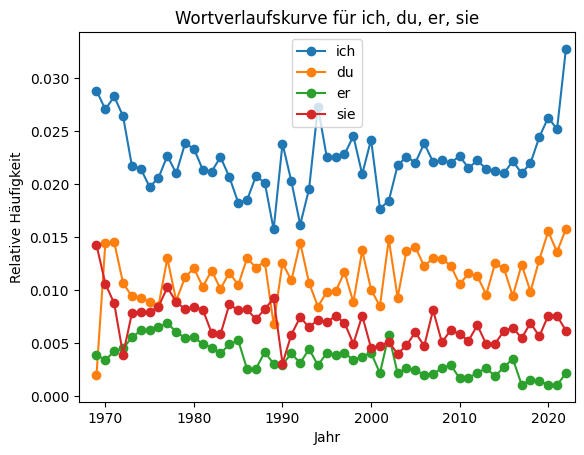

In [13]:
#Iterieren über die zu plottenden Wörter
for word in words:
    #Schaffen eines Sub-DataFrame über Filter
    word_df = songkorpus[songkorpus["Token"] == word]
    #Sortieren des Sub-DataFrame nach der Spalte "Jahr" und Zurücksetzen des Index
    word_df = word_df.sort_values(by="Jahr", ascending=True).reset_index()
    #Definieren von x und y, "Jahr" soll auf x-Achse geplotted werden, "Relative Häufigkeit" auf y-Achse
    x = word_df["Jahr"]
    y = word_df["Relative Häufigkeit"]
    #Eigentliches Plotten
    plt.plot(x, y, 'o-')

#Zusätzliches Verfeinern und Beschriften des Plots
plt.title(f"Wortverlaufskurve für {', '.join([word for word in words])}")
plt.xlabel("Jahr")
plt.ylabel("Relative Häufigkeit")
plt.xlim(1967, 2023)
plt.legend(words, loc="best")